In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
!ls ./q1-superai-ss-5-cp-axtra

calendar_date.csv	    historical_sale_2025_1.csv
historical_sale_2023_1.csv  item_hierarchy.csv
historical_sale_2023_2.csv  Q1_sample_submission.csv
historical_sale_2024_1.csv  store_data.csv
historical_sale_2024_2.csv


# Prepare Data

In [3]:
SALES_FILES = ["historical_sale_2023_1.csv", "historical_sale_2023_2.csv", "historical_sale_2024_1.csv", "historical_sale_2024_2.csv", "historical_sale_2025_1.csv"] 
file_lists = []

for filename in SALES_FILES:
    df = pd.read_csv("./q1-superai-ss-5-cp-axtra/" + filename, index_col=None, header=0)
    file_lists.append(df)

df = pd.concat(file_lists, axis=0, ignore_index=True)

First group the data by stored_id and item_id combination, and also sorted the data by date.

In [4]:
grouped = df.sort_values(["date"], ascending=True).groupby(by = ["store_id", "item_id"])

Find number of groups in the dataset.

In [5]:
len(grouped)

1209976

Take a look at one group, for example.

In [6]:
sample_group = grouped.get_group((1338, 4227))
sample_group.loc[:,"date"] = pd.to_datetime(sample_group["date"])
sample_group = sample_group.set_index("date")
sample_group

store_id  item_id   sales  units_sold
date                                             
2023-01-01      1338     4227   35.00         1.0
2023-01-03      1338     4227   70.00         2.0
2023-01-05      1338     4227   35.00         1.0
2023-01-10      1338     4227   59.00         2.0
2023-01-14      1338     4227   59.00         1.0
2023-01-16      1338     4227   59.00         2.0
2023-01-19      1338     4227  118.00         3.0
2023-01-23      1338     4227  118.00         4.0
2023-01-25      1338     4227   59.00         2.0
2023-02-10      1338     4227   59.00         1.0
2023-02-12      1338     4227  118.00         2.0
2023-02-13      1338     4227   29.50         2.0
2023-02-18      1338     4227   73.75         5.0
2023-02-23      1338     4227   59.00         1.0
2023-02-24      1338     4227   59.00         1.0
2023-02-27      1338     4227   29.50         2.0
2023-03-16      1338     4227   88.50         3.0
2023-03-17      1338     4227   44.25         3.0
2023-03-19      1338     4227   88.50         3.0
2023-03-20      1338     4227   44.25         3.0

The date is irregular. We may make it regular by using the code below

In [7]:
# sample_group = sample_group.set_index("date")
sample_group = sample_group.asfreq('D')
sample_group = sample_group.ffill()
sample_group

store_id  item_id  sales  units_sold
date                                            
2023-01-01    1338.0   4227.0  35.00         1.0
2023-01-02    1338.0   4227.0  35.00         1.0
2023-01-03    1338.0   4227.0  70.00         2.0
2023-01-04    1338.0   4227.0  70.00         2.0
2023-01-05    1338.0   4227.0  35.00         1.0
...              ...      ...    ...         ...
2023-03-16    1338.0   4227.0  88.50         3.0
2023-03-17    1338.0   4227.0  44.25         3.0
2023-03-18    1338.0   4227.0  44.25         3.0
2023-03-19    1338.0   4227.0  88.50         3.0
2023-03-20    1338.0   4227.0  44.25         3.0

[79 rows x 4 columns]

<Axes: xlabel='date'>

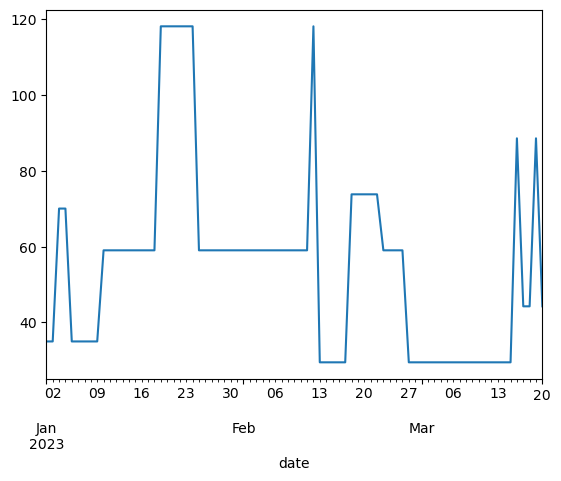

In [9]:
# sample_group.plot(y="sales")
sample_group["sales"] = sample_group["sales"].ffill()
sample_group["sales"].plot()

# Predict

In [8]:
answer_sheet = pd.read_csv("./q1-superai-ss-5-cp-axtra/Q1_sample_submission.csv")
answer_sheet

id        date  store_id  \
0         8a68085c-3e5d-4889-a31f-dca66615701a  2025-03-24      6626   
1         41166dc5-cd9e-4cff-979c-02aa8ae57677  2025-03-25      6626   
2         1df657c9-1bd3-4d8d-92c6-05540ea640f1  2025-03-26      6626   
3         207aa864-2828-4430-bc7f-4b505f6a0d86  2025-03-27      6626   
4         febcc7f8-6864-476b-b97c-9869152d9072  2025-03-28      6626   
...                                        ...         ...       ...   
11370375  856db516-2925-4016-a80d-9f77d463f519  2025-04-16      6571   
11370376  cea8962e-f6bd-4110-8cd3-451df454e22d  2025-04-17      6571   
11370377  f3166e7a-726e-4ef3-bd67-2418968b0134  2025-04-18      6571   
11370378  9e9fa851-761a-4884-82e1-30aac9f83cf9  2025-04-19      6571   
11370379  aab04cf2-d1ba-4c02-99a7-6b58f122f4b3  2025-04-20      6571   

           item_id  sales  
0         51254232    0.0  
1         51254232    0.0  
2         51254232    0.0  
3         51254232    NaN  
4         51254232    NaN  
...            ...    ...  
11370375  52587464    NaN  
11370376  52587464    NaN  
11370377  52587464    NaN  
11370378  52587464    NaN  
11370379  52587464    NaN  

[11370380 rows x 5 columns]

Find the number of groups (store_id and item_id combinations) in the submission file

In [10]:
grouped_ans = answer_sheet.groupby(by = ["store_id", "item_id"])
len(grouped_ans)

406085

In [11]:
from tqdm import tqdm

# There are 406805 groups (store_id and item_id combinations) in the submission file
for i in tqdm(range(0, 406085, 1)):
    store_id = answer_sheet.iloc[i*28, 2]
    item_id = answer_sheet.iloc[i*28, 3]
    # Some group in the submission file is not present in the training set, so guess 0
    try:
        sales_value = grouped.get_group((store_id, item_id)).iloc[-1, 3]
    except KeyError:
        sales_value = 0
    answer_sheet.iloc[i*28:(i+1)*28, -1] = sales_value

100%|█████████████████████████████████| 406085/406085 [01:45<00:00, 3834.56it/s]


In [12]:
answer_sheet.to_csv("test_submission.csv", index=False)